In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Income.csv")
df.head()

,Name,Age,Income($),Unnamed: 3
0,Rob,27,70000,NaN
1,Michael,29,90000,NaN
2,Mohan,29,61000,NaN
3,Ismail,28,60000,NaN
4,Kory,42,150000,NaN


In [3]:
df=df.dropna(how="all",axis=1)
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


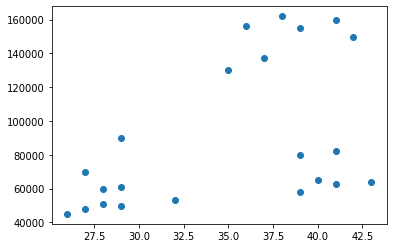

In [4]:
plt.scatter(df.Age,df["Income($)"])

In [5]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [8]:
#Seperating the clusters into different data frames

No handles with labels found to put in legend.


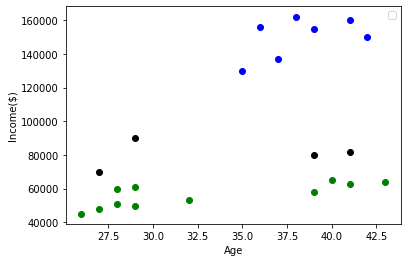

In [9]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1["Income($)"],color='green')
plt.scatter(df2.Age,df2["Income($)"],color='blue')
plt.scatter(df3.Age,df3["Income($)"],color='black')
plt.xlabel('Age')
plt.ylabel("Income($)")
plt.legend()

In [16]:
scaler=MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df.head()

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1


In [19]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [20]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [24]:
df["Cluster"]=y_predicted
df.drop("cluster",axis=1,inplace=True)
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


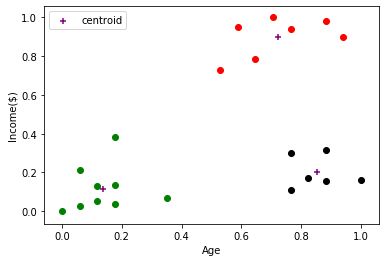

In [27]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
plt.scatter(df1.Age,df1["Income($)"],color='green')
plt.scatter(df2.Age,df2["Income($)"],color='red')
plt.scatter(df3.Age,df3["Income($)"],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+',label='centroid')
plt.xlabel('Age')
plt.ylabel("Income($)")
plt.legend()

In [28]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

In [29]:
#Elbow Technique

In [30]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[["Age","Income($)"]])
    sse.append(km.inertia_)

In [31]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.3491047094419564,
 0.27768187154369983,
 0.21055478995472487,
 0.16858512236029755,
 0.13937852495507835,
 0.10383752586603558]

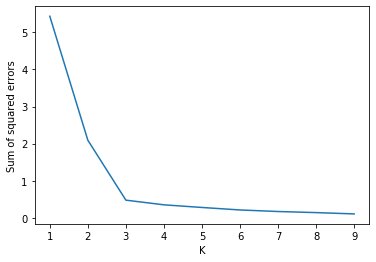

In [32]:
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_rng,sse)